In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv(r"C:\Users\revya\OneDrive\Рабочий стол\work\jupyter_projects\microsoft course\ML-For-Beginners\2-Regression\data\US-pumpkins.csv")
data.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [4]:
len=data.shape[0]
isna=data.isna().sum()
useless=[i for i in isna.index if isna[i]/len>0.8]
data_wu=data.drop(useless,axis=1)
data_wu.isna().sum()

data_wu.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City Name    1757 non-null   object 
 1   Package      1757 non-null   object 
 2   Variety      1752 non-null   object 
 3   Date         1757 non-null   object 
 4   Low Price    1757 non-null   float64
 5   High Price   1757 non-null   float64
 6   Mostly Low   1654 non-null   float64
 7   Mostly High  1654 non-null   float64
 8   Origin       1754 non-null   object 
 9   Item Size    1478 non-null   object 
 10  Color        1141 non-null   object 
 11  Repack       1757 non-null   object 
dtypes: float64(4), object(8)
memory usage: 164.8+ KB


In [5]:
object_cols=[col for col in data_wu.dtypes.index if data_wu.dtypes[col]=="object"]
object_cols
numeric_cols=[col for col in data_wu.dtypes.index if data_wu.dtypes[col]=="float64"]
numeric_cols,object_cols

(['Low Price', 'High Price', 'Mostly Low', 'Mostly High'],
 ['City Name',
  'Package',
  'Variety',
  'Date',
  'Origin',
  'Item Size',
  'Color',
  'Repack'])

In [6]:
#преобразуем дату к numeric
# Преобразование даты в тип datetime
data_wu['Date'] = pd.to_datetime(data_wu['Date'], errors='coerce')
minn_date=data_wu["Date"].min()
# Выбор начальной даты (например, начало эпохи Unix)
epoch = pd.Timestamp('2014-11-29')

# Преобразование даты в количество дней с начала эпохи Unix
data_wu['Date_as_float'] = (data_wu['Date'] - epoch).dt.total_seconds() / (24 * 60 * 60)


C:\Users\revya\AppData\Local\Temp\ipykernel_11992\2159765879.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_wu['Date'] = pd.to_datetime(data_wu['Date'], errors='coerce')


In [7]:
data_wu["Date"][0].month
#type(data_wu["Date"][0])

4

In [8]:
data_wu.head()

,City Name,Package,Variety,Date,Low Price,High Price,Mostly Low,Mostly High,Origin,Item Size,Color,Repack,Date_as_float
0,BALTIMORE,24 inch bins,NaN,2017-04-29,270.0,280.0,270.0,280.0,MARYLAND,lge,NaN,E,882.0
1,BALTIMORE,24 inch bins,NaN,2017-05-06,270.0,280.0,270.0,280.0,MARYLAND,lge,NaN,E,889.0
2,BALTIMORE,24 inch bins,HOWDEN TYPE,2016-09-24,160.0,160.0,160.0,160.0,DELAWARE,med,ORANGE,N,665.0
3,BALTIMORE,24 inch bins,HOWDEN TYPE,2016-09-24,160.0,160.0,160.0,160.0,VIRGINIA,med,ORANGE,N,665.0
4,BALTIMORE,24 inch bins,HOWDEN TYPE,2016-11-05,90.0,100.0,90.0,100.0,MARYLAND,lge,ORANGE,N,707.0


In [9]:
#отсортируем по месяцу
distribution_by_month=data_wu.groupby(data_wu["Date"].apply(lambda x:x.month_name())).count()["City Name"]
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
# Преобразование индекса в категориальный тип данных с правильным порядком
distribution_by_month.index = pd.CategoricalIndex(distribution_by_month.index, categories=month_order, ordered=True)

# Сортировка данных
distribution_by_month = distribution_by_month.sort_index()
distribution_by_month

Date
January        6
February       4
March          4
April          6
May            5
June           7
July           5
August        18
September    635
October      868
November     180
December      19
Name: City Name, dtype: int64

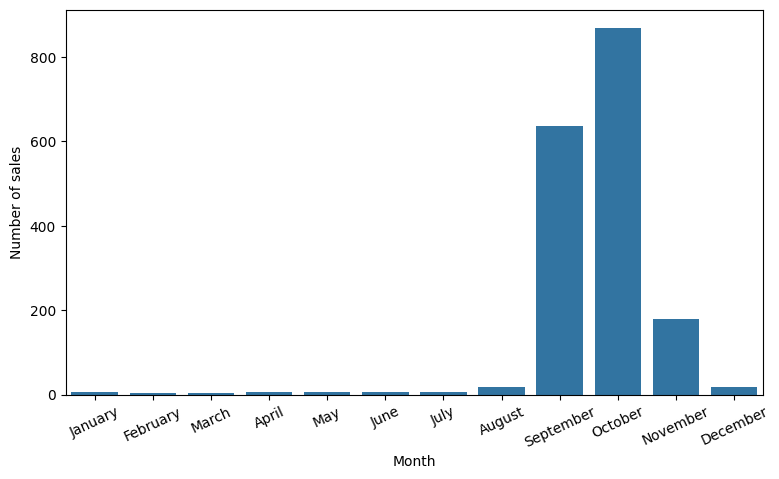

In [10]:
plt.figure(figsize=(9, 5))


#взят city name просто что бы получить серию
ax=sns.barplot(distribution_by_month)
plt.xticks(rotation=25)
plt.xlabel('Month')
plt.ylabel('Number of sales')
plt.show()

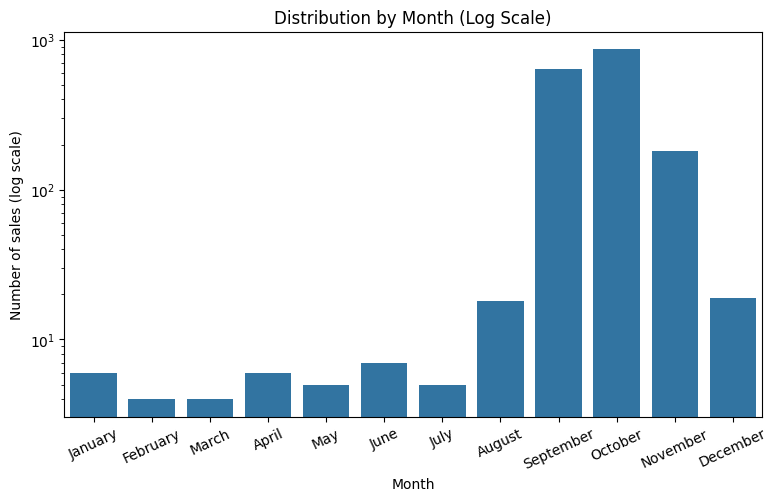

In [11]:
# Сделаем шкалу логарифмической
plt.figure(figsize=(9, 5))
ax = sns.barplot(x=distribution_by_month.index, y=distribution_by_month.values)
plt.yscale('log')
plt.xticks(rotation=25)
plt.xlabel('Month')
plt.ylabel('Number of sales (log scale)')
plt.title('Distribution by Month (Log Scale)')
plt.show()

In [12]:
#сколько уникальных в каждом столбце
object_cols=[col for col in data_wu.dtypes.index if data_wu.dtypes[col]=="object"]
object_cols
numeric_cols=[col for col in data_wu.dtypes.index if data_wu.dtypes[col]=="float64"]
numeric_cols,object_cols
number_of_unique={col:data_wu[col].unique().shape[0] for col in object_cols}
number_of_unique



{'City Name': 13,
 'Package': 15,
 'Variety': 11,
 'Origin': 25,
 'Item Size': 8,
 'Color': 4,
 'Repack': 2}

In [13]:
cols_for_charts=['City Name','Package','Variety','Item Size','Color','Repack']

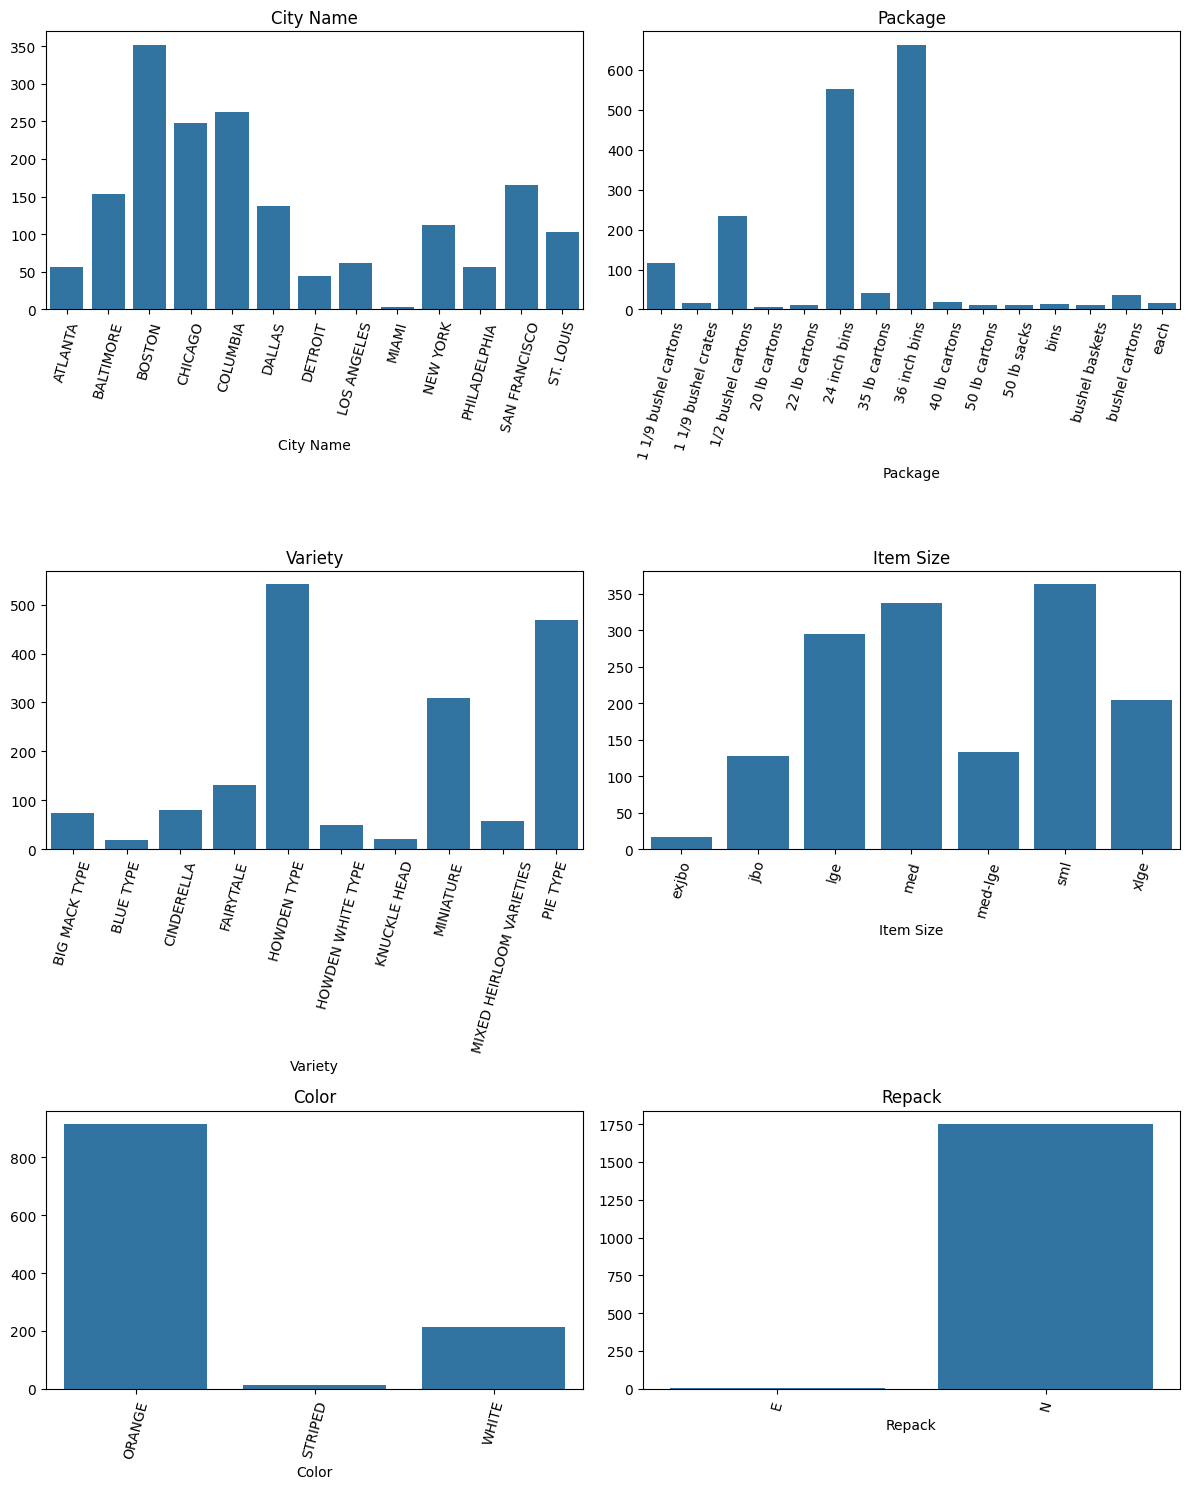

In [14]:
object_distribution_by={col:data_wu.groupby(data_wu[col]).size() for col in cols_for_charts}


fig, axes = plt.subplots(3, 2, figsize=(12, 15))


for idx, col in enumerate(cols_for_charts):
    row = idx // 2
    col_idx = idx % 2
    sns.barplot(x=object_distribution_by[col].index, y=object_distribution_by[col].values, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(col)
    axes[row, col_idx].tick_params(axis='x', rotation=75)
    
plt.tight_layout()
plt.show()

In [15]:
data_wu.columns

Index(['City Name', 'Package', 'Variety', 'Date', 'Low Price', 'High Price',
       'Mostly Low', 'Mostly High', 'Origin', 'Item Size', 'Color', 'Repack',
       'Date_as_float'],
      dtype='object')

In [16]:
# Функция для вычисления цены
def make_price(row):
    if pd.isna(row["Mostly Low"]) and pd.isna(row["Mostly High"]):
        row["Price"] = (row["Low Price"] + row["High Price"]) / 2
    elif not pd.isna(row["Mostly Low"]) and pd.isna(row["Mostly High"]):
        row["Price"] = (row["Mostly Low"] + row["High Price"]) / 2
    elif pd.isna(row["Mostly Low"]) and not pd.isna(row["Mostly High"]):
        row["Price"] = (row["Low Price"] + row["Mostly High"]) / 2
    elif not pd.isna(row["Mostly Low"]) and not pd.isna(row["Mostly High"]):
        row["Price"] = (row["Mostly Low"] + row["Mostly High"]) / 2
    
    return row

# Применение функции к каждой строке
data_wu = data_wu.apply(make_price, axis=1)

# Просмотр первых строк данных для проверки
data_wu.head()

,City Name,Package,Variety,Date,Low Price,High Price,Mostly Low,Mostly High,Origin,Item Size,Color,Repack,Date_as_float,Price
0,BALTIMORE,24 inch bins,NaN,2017-04-29,270.0,280.0,270.0,280.0,MARYLAND,lge,NaN,E,882.0,275.0
1,BALTIMORE,24 inch bins,NaN,2017-05-06,270.0,280.0,270.0,280.0,MARYLAND,lge,NaN,E,889.0,275.0
2,BALTIMORE,24 inch bins,HOWDEN TYPE,2016-09-24,160.0,160.0,160.0,160.0,DELAWARE,med,ORANGE,N,665.0,160.0
3,BALTIMORE,24 inch bins,HOWDEN TYPE,2016-09-24,160.0,160.0,160.0,160.0,VIRGINIA,med,ORANGE,N,665.0,160.0
4,BALTIMORE,24 inch bins,HOWDEN TYPE,2016-11-05,90.0,100.0,90.0,100.0,MARYLAND,lge,ORANGE,N,707.0,95.0


In [19]:
data=data_wu.drop(['Low Price', 'High Price','Mostly Low', 'Mostly High',],axis=1)
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   City Name      1757 non-null   object        
 1   Package        1757 non-null   object        
 2   Variety        1752 non-null   object        
 3   Date           1757 non-null   datetime64[ns]
 4   Origin         1754 non-null   object        
 5   Item Size      1478 non-null   object        
 6   Color          1141 non-null   object        
 7   Repack         1757 non-null   object        
 8   Date_as_float  1757 non-null   float64       
 9   Price          1757 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 137.4+ KB


In [53]:
#посмотрим на распределение цены по месяцам
mean_prices_by_month={month:data[data["Date"].dt.month_name()==month]["Price"].mean() for month in month_order}
mean_prices_by_month

{'January': 131.66666666666666,
 'February': 216.875,
 'March': 210.0,
 'April': 220.83333333333334,
 'May': 233.5,
 'June': 291.42857142857144,
 'July': 252.0,
 'August': 119.58888888888889,
 'September': 130.52711023622047,
 'October': 128.445650921659,
 'November': 108.90347222222222,
 'December': 84.92105263157895}

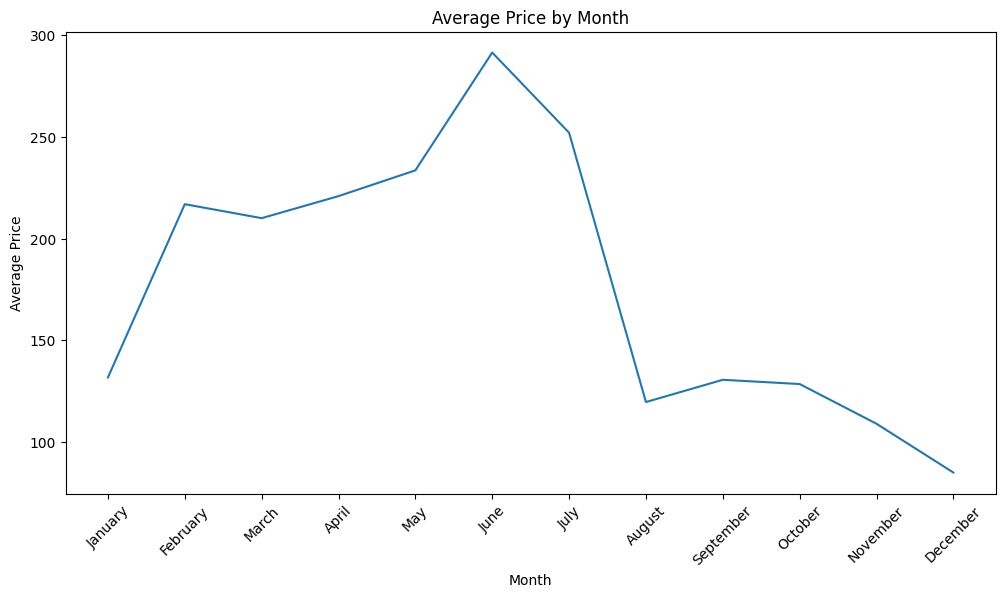

In [54]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=mean_prices_by_month.keys(),y=mean_prices_by_month.values())
plt.title('Average Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

In [60]:
sales_by_month = [(date.month_name(), price) for date, price in zip(data["Date"], data["Price"])]
sales_df = pd.DataFrame(sales_by_month, columns=['Month', 'Price'])

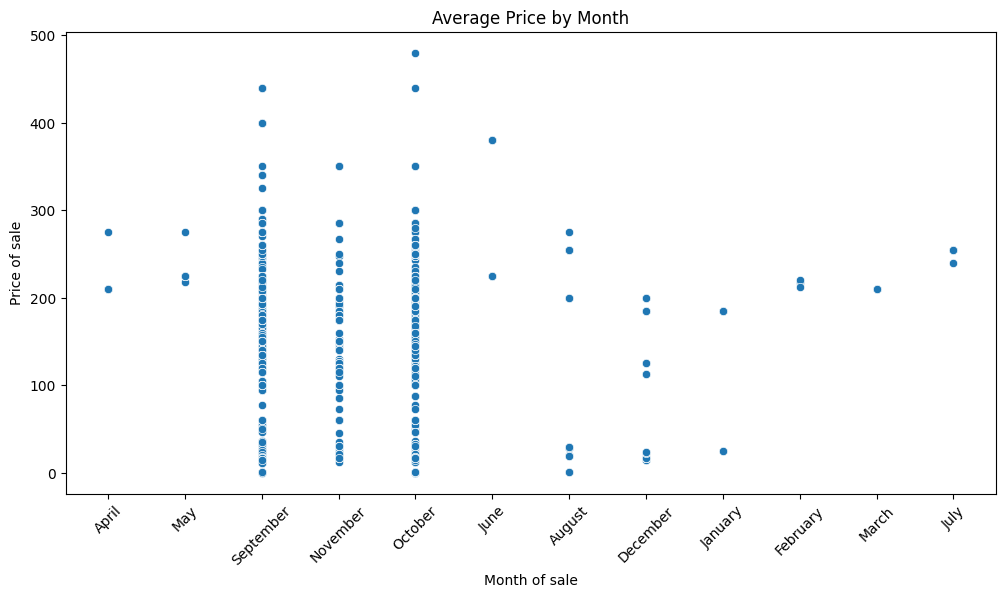

In [62]:


plt.figure(figsize=(12, 6))
sns.scatterplot(data=sales_df,x="Month",y="Price")
plt.title('Average Price by Month')
plt.xlabel('Month of sale')
plt.ylabel('Price of sale')
plt.xticks(rotation=45)
plt.show()

In [72]:
data.columns

Index(['City Name', 'Package', 'Variety', 'Date', 'Origin', 'Item Size',
       'Color', 'Repack', 'Date_as_float', 'Price'],
      dtype='object')

In [78]:
data.head()

,City Name,Package,Variety,Date,Origin,Item Size,Color,Repack,Date_as_float,Price
0,BALTIMORE,24 inch bins,NaN,2017-04-29,MARYLAND,lge,NaN,E,882.0,275.0
1,BALTIMORE,24 inch bins,NaN,2017-05-06,MARYLAND,lge,NaN,E,889.0,275.0
2,BALTIMORE,24 inch bins,HOWDEN TYPE,2016-09-24,DELAWARE,med,ORANGE,N,665.0,160.0
3,BALTIMORE,24 inch bins,HOWDEN TYPE,2016-09-24,VIRGINIA,med,ORANGE,N,665.0,160.0
4,BALTIMORE,24 inch bins,HOWDEN TYPE,2016-11-05,MARYLAND,lge,ORANGE,N,707.0,95.0


In [138]:
sales_by_day = [
    (j, month, price) 
    for j, month,price in zip(
        data["Date"].dt.strftime('%j'),
        data["Date"].dt.strftime('%B'), #возвращает порядковый номер дня в году
        data["Price"]
    )
]

sales_by_day_df = pd.DataFrame(sales_by_day, columns=['Day_from_start','Month','Price'])
sales_by_day_df=sales_by_day_df.sort_values(by='Day_from_start')
sales_by_day_df['Day_from_start']=sales_by_day_df['Day_from_start'].astype("int")


In [141]:
sales_by_day_df
month_order

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

1
32
60
91
121
152
182
213
244
274
305
335


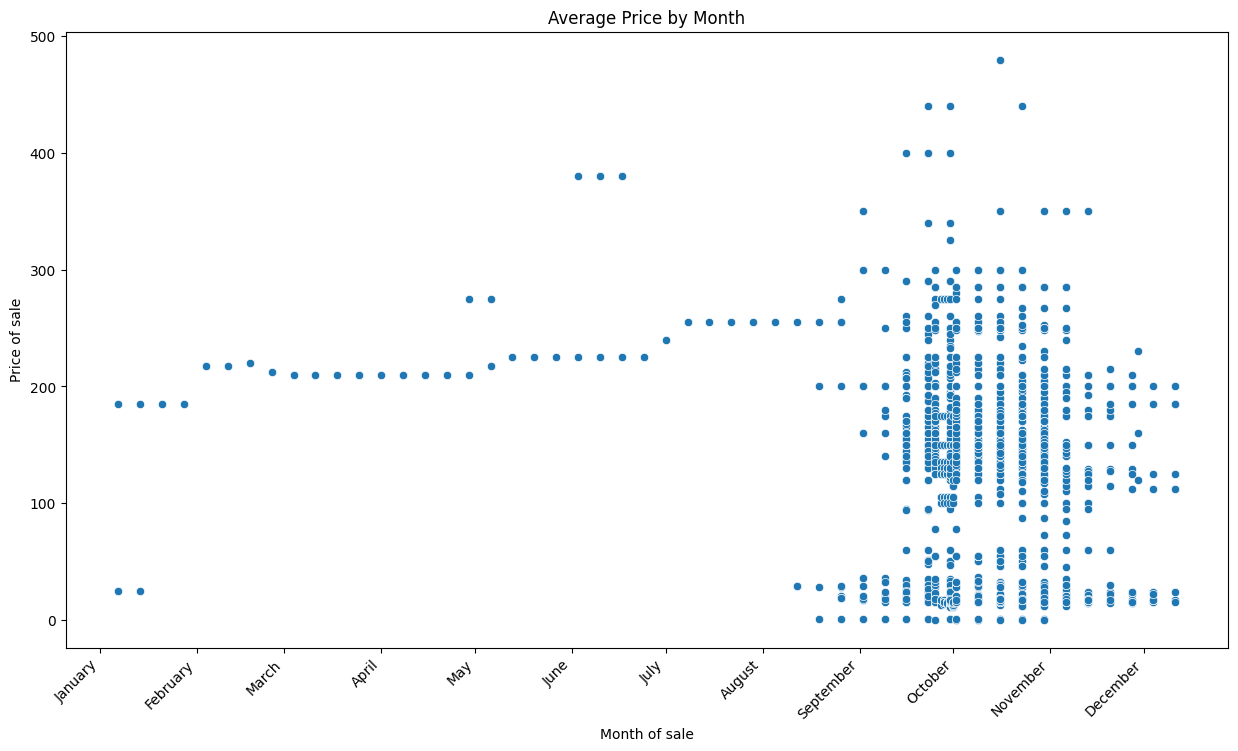

In [146]:
# Создаем scatterplot
plt.figure(figsize=(15, 8))
scatter = sns.scatterplot(data=sales_by_day_df, x="Day_from_start", y="Price")
plt.title('Average Price by Month')
plt.xlabel('Month of sale')
plt.ylabel('Price of sale')



# Добавляем легенду отдельно
# Заменяем метки оси X на месяцы
month_starts = {
    'January': 1,
    'February': 32,
    'March': 60,
    'April': 91,
    'May': 121,
    'June': 152,
    'July': 182,
    'August': 213,
    'September': 244,
    'October': 274,
    'November': 305,
    'December': 335
}
month_positions = []


j=0
for i in range(365):
    if i in sales_by_day_df["Day_from_start"] and i>=month_starts[month_order[j]] :
        month_positions.append(i)
        j+=1
        if j==12:
            break
        



plt.xticks(ticks=month_positions, labels=month_starts.keys(), rotation=45, ha='right')

plt.show()


In [135]:
sales_by_day_df["Day_from_start"]
str(14).zfill(3) in sales_by_day_df["Day_from_start"]
int("007")

7